In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [18]:
mnist = keras.datasets.mnist.load_data(path="mnist.npz")

In [19]:
training_set = mnist[0]
test_set = mnist[1]
training_images = training_set[0]
training_labels = training_set[1]
test_images = test_set[0]
test_labels = test_set[1]

In [20]:
print("Training Images : ", np.shape(training_images))
print("Training Labels : ", np.shape(training_labels))
print("Test Images : ", np.shape(test_images))
print("Test Labels : ", np.shape(test_labels))

Training Images :  (60000, 28, 28)
Training Labels :  (60000,)
Test Images :  (10000, 28, 28)
Test Labels :  (10000,)


its a  9


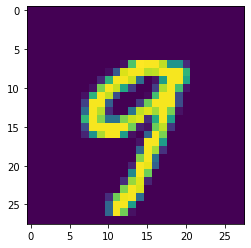

In [22]:
plt.imshow(training_images[45])
print("its a ", training_labels[45])

its a  4


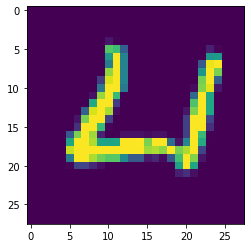

In [23]:
plt.imshow(test_images[33])
print("its a ", test_labels[33])

In [24]:
#reshaping the input to the conv net
training_images = np.reshape(training_images, (60000, 28, 28, 1))
test_images = np.reshape(test_images, (10000, 28, 28, 1))

In [25]:
print(np.shape(training_images))
print(np.shape(test_images))

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [26]:
#normalizing the images
training_images = training_images/255
test_images = test_images/255

In [27]:
#model : conv->pool->Flatten->FC(with ReLU)->FC(with Softmax)
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
                                 keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
 class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.998):
                print("\nReached 99.8% accuracy so cancelling training!")
                self.model.stop_training = True
                
callbacks = myCallback()

In [34]:
model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 2/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0195 - accuracy: 0.9938
Epoch 3/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0138 - accuracy: 0.9956
Epoch 4/20
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0085 - accuracy: 0.9973
Epoch 5/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0073 - accuracy: 0.9975
Epoch 6/20
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0063 - accuracy: 0.9980
Epoch 7/20
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0040 - accuracy: 0.9986

Reached 99.8% accuracy so cancelling training!


In [35]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 8ms/step - loss: 0.0578 - accuracy: 0.9857


[0.05780277028679848, 0.9857000112533569]

In [36]:
predictions = model.predict(test_images)
print(np.shape(predictions))

(10000, 10)


[1.0000000e+00 6.9187067e-19 1.9314961e-11 2.3153912e-19 1.3724021e-23
 1.0599351e-13 6.9261051e-14 1.8356796e-14 9.0010178e-16 7.3664019e-11]
0


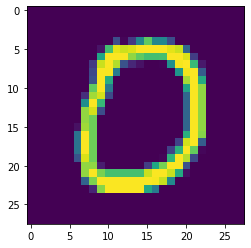

In [40]:
plt.imshow(np.reshape(test_images[10], (28,28)))
print(predictions[10])
print(test_labels[10])